In [17]:
from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp
import hiive.visualization as viz
import time
import matplotlib.pyplot as plt
import numpy as np
from utils import *
#from hiive.visualization import mdpviz

In [84]:
def make_plot(name, x, x_label, y, y_label):
    plt.plot(x, y, label=y_label)
    title = name
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    plt.show()
    plt.clf()
def make_plot_scatter(name, x, x_label, y, y_label):
    plt.scatter(x, y, label=y_label, s=0.1)
    title = name
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    plt.show()
    plt.clf()
def plot_result(result, name):
    reward = []
    error = []
    time = []
    max_v = []
    mean_v = []
    iter = []
    #state = []
    for it in result:
        reward.append(it['Reward'])
        error.append(it['Error'])
        time.append(it['Time'])
        max_v.append(it['Max V'])
        mean_v.append(it['Mean V'])
        iter.append(it['Iteration'])
        #state.append(it['State'])

    fig, axs = plt.subplots(2, 2)
    fig.suptitle(name)
    axs[0, 0].plot(iter, reward, label="reward")
    axs[0, 0].set_title("reward per iteration")
    axs[0, 0].set(xlabel='iteration', ylabel='reward')
    axs[0, 1].plot(iter, error, label="error")
    axs[0, 1].set_title("error per iteration")
    axs[0, 1].set(xlabel='iteration', ylabel='error')
    axs[1, 0].plot(iter, time, label="time")
    axs[1, 0].set_title("time per iteration")
    axs[1, 0].set(xlabel='iteration', ylabel='time')
    axs[1, 1].plot(iter, mean_v, label="mean V")
    axs[1, 1].set_title("mean V per iteration")
    axs[1, 1].set(xlabel='iteration', ylabel='mean V')
    plt.show()
    plt.clf()

def run_with_n_states(mdp, n_states_arr=[4, 8, 16, 32, 64, 128]):
    iters = []
    times = []
    policies = []
    for n_states in n_states_arr:
        P, R = mdptoolbox.example.forest(S=n_states, r1=4, r2=2)
        mdp_inst = mdp(P, R, 0.9)
        result = mdp_inst.run()
        times.append(mdp_inst.time)
        iters.append(mdp_inst.iter)
        policies.append(mdp_inst.policy)
    return iters, times, policies


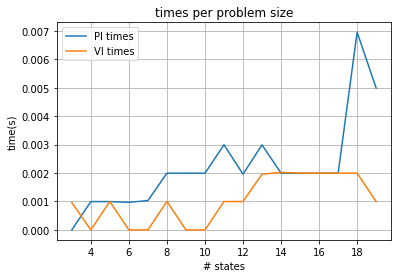

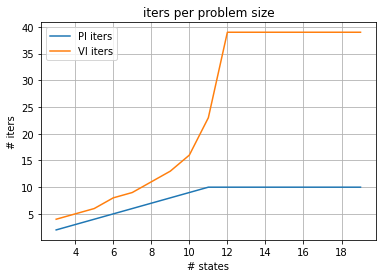

<Figure size 432x288 with 0 Axes>

In [23]:
n_states_arr=range(3, 20)
vi_iters, vi_times, vi_policies = run_with_n_states(
                        mdptoolbox.mdp.ValueIteration,
                        n_states_arr
                    )
pi_iters, pi_times, pi_policies = run_with_n_states(
                        mdptoolbox.mdp.PolicyIteration,
                        n_states_arr
                    )
plt.plot(n_states_arr, pi_times, label="PI times")
plt.plot(n_states_arr, vi_times, label="VI times")
title = 'times per problem size'
plt.title(title)
plt.xlabel('# states')
plt.ylabel('time(s)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

plt.plot(n_states_arr, pi_iters, label="PI iters")
plt.plot(n_states_arr, vi_iters, label="VI iters")
title = 'iters per problem size'
plt.title(title)
plt.xlabel('# states')
plt.ylabel('# iters')
plt.grid()
plt.legend()
plt.show()
plt.clf()

In [24]:
P, R = mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
#pi.setVerbose()
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 14.1448095376563,
  'Time': 0.001978635787963867,
  'Max V': 23.172433847048566,
  'Mean V': 5.907240476882816,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 10.904809537656298,
  'Time': 0.002956867218017578,
  'Max V': 23.172433847048566,
  'Mean V': 6.61448095376563,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 8.2804095376563,
  'Time': 0.002956867218017578,
  'Max V': 23.172433847048566,
  'Mean V': 7.159721430648446,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 6.1546455376563,
  'Time': 0.003954410552978516,
  'Max V': 23.172433847048566,
  'Mean V': 7.57374190753126,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 4.4327766976562994,
  'Time': 0.0049512386322021484,
  'Max V': 23.172433847048566,
  'M

============== PI Test ==============
{'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 14.1448095376563, 'Time': 0.0019958019256591797, 'Max V': 23.172433847048566, 'Mean V': 5.907240476882816, 'Iteration': 1}
num iters to converge: 10
time to converge:  0.007977962493896484
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


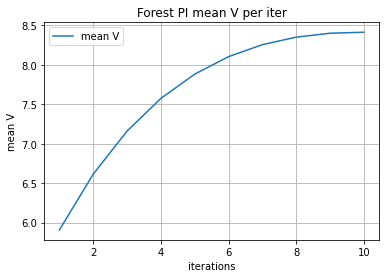

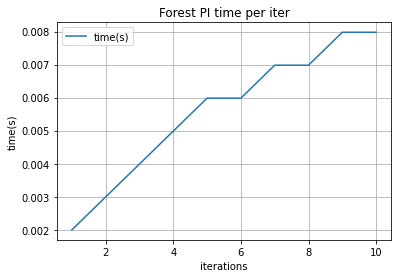

<Figure size 432x288 with 0 Axes>

In [35]:
print("============== PI Test ==============")
P, R = mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
#pi.setVerbose()
start_time = time.time()
result = pi.run()
time_elapsed = time.time() - start_time
print(result[0])
numIterations = len(result)
mean_vs = [row['Mean V'] for row in result]
times = [row['Time'] for row in result]
print("num iters to converge:", numIterations)
print("time to converge: ", time_elapsed)
print(pi.policy)

make_plot("Forest PI mean V per iter", range(1, numIterations+1), 'iterations', mean_vs, 'mean V')
make_plot("Forest PI time per iter", range(1, numIterations+1), 'iterations', times, 'time(s)')


============== VI Test ==============
{'State': None, 'Action': None, 'Reward': 4.0, 'Error': 4.0, 'Time': 0.0, 'Max V': 4.0, 'Mean V': 1.1, 'Iteration': 1}
num iters to converge: 39
time to converge:  0.004022836685180664
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


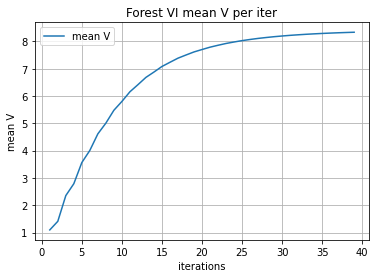

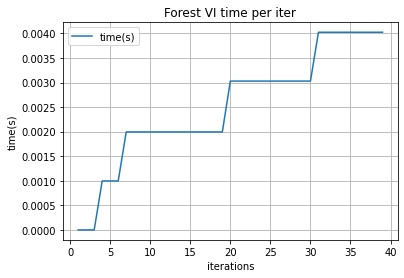

<Figure size 432x288 with 0 Axes>

In [36]:
print("============== VI Test ==============")
P, R = mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9)
#pi.setVerbose()
start_time = time.time()
result = vi.run()
time_elapsed = time.time() - start_time
print(result[0])
numIterations = len(result)
mean_vs = [row['Mean V'] for row in result]
times = [row['Time'] for row in result]
print("num iters to converge:", numIterations)
print("time to converge: ", time_elapsed)
print(vi.policy)

make_plot("Forest VI mean V per iter", range(1, numIterations+1), 'iterations', mean_vs, 'mean V')
make_plot("Forest VI time per iter", range(1, numIterations+1), 'iterations', times, 'time(s)')

In [37]:
print("============== QL Test ==============")
P, R = mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
ql = mdptoolbox.mdp.QLearning(P, R, gamma=0.95, alpha=0.1,
                   alpha_decay=0.99, alpha_min=0.001,
                   epsilon=1.0, epsilon_min=0.1,
                   epsilon_decay=0.99,
                    n_iter=20000)
result = ql.run()
print(result[0])
epRewards = [row['Reward'] for row in result]
times = [row['Time'] for row in result]
mean_vs = [row['Mean V'] for row in result]
print(ql.policy)

============== QL Test ==============
{'State': 4, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.0, 'Alpha': 0.099, 'Epsilon': 0.99, 'Gamma': 0.95, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 2}
(0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0)


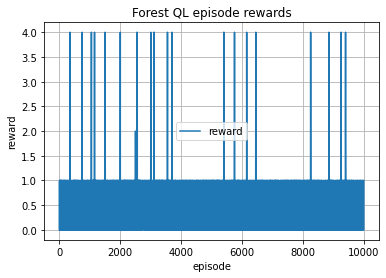

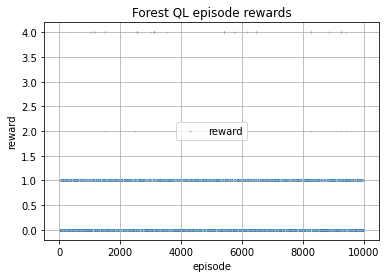

<Figure size 432x288 with 0 Axes>

In [85]:
make_plot("Forest QL episode rewards", range(1, 10001), 'episode', epRewards, 'reward')
make_plot_scatter("Forest QL episode rewards", range(1, 10001), 'episode', epRewards, 'reward')

In [79]:
def tune_ql(arg_name, arg_range):
    P, R = mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.01)
    args = {
        'transitions': P,
        'reward': R,
        'gamma': 0.95,
        'alpha': 0.1,
        'alpha_decay': 0.99,
        'epsilon': 0.1,
        'epsilon_decay': 0.99,
        'n_iter': 20000
    }
    #max_iters = range(1000, 20000, 1000)
    
    times_elapsed = []
    mean_steps = []
    mean_vs = []
    loss_perc = []
    for arg_val in arg_range:
        args[arg_name] = arg_val
        ql = mdptoolbox.mdp.QLearning(**args)
        start_time = time.time()
        result = ql.run()
        time_elapsed = time.time() - start_time
        print("policy for ", arg_name, " = ", arg_val, ":", ql.policy )
        #print(np.mean(ql.V))
        mean_vs.append(np.mean(ql.V))
        #print(ql.policy)
        #policyQL, qTableQL, epRewards = Q_learning_train(**args)
        #mean_number_of_steps, lost_games_perc = score_frozen_lake(env, policyQL)
        times_elapsed.append(time_elapsed)
        #mean_steps.append(mean_number_of_steps)
        #loss_perc.append(lost_games_perc)
    #make_plot("QL loss pct per " + arg_name, arg_range, arg_name, loss_perc, 'lost game %')
    make_plot("QL mean_V per  " + arg_name, arg_range, arg_name, mean_vs, 'mean V')
    make_plot("QL times per  " + arg_name, arg_range, arg_name, times_elapsed, 'times(s)')
    #env.reset()
    
def tune_pi(arg_name, arg_range):
    P, R = mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.1)
    args = {
        'transitions': P,
        'reward': R,
        'gamma': 0.95,
        'max_iter': 20000
    }
    #max_iters = range(1000, 20000, 1000)
    
    times_elapsed = []
    mean_steps = []
    loss_perc = []
    mean_vs = []
    for arg_val in arg_range:
        args[arg_name] = arg_val
        pi = hiive.mdptoolbox.mdp.PolicyIteration(**args)
        start_time = time.time()
        result = pi.run()
        time_elapsed = time.time() - start_time
        print("policy for ", arg_name, " = ", arg_val, ":", pi.policy )
        mean_vs.append(np.mean(pi.V))
        times_elapsed.append(time_elapsed)
    make_plot("PI mean_V per  " + arg_name, arg_range, arg_name, mean_vs, 'mean V')   
    make_plot("PI times per  " + arg_name, arg_range, arg_name, times_elapsed, 'times(s)')
    #env.reset()
    
def tune_vi(arg_name, arg_range):
    P, R = mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.1)
    args = {
        'transitions': P,
        'reward': R,
        'gamma': 0.95,
        'max_iter': 20000
    }
    #max_iters = range(1000, 20000, 1000)
    
    times_elapsed = []
    mean_steps = []
    loss_perc = []
    mean_vs = []
    for arg_val in arg_range:
        args[arg_name] = arg_val
        pi = hiive.mdptoolbox.mdp.ValueIteration(**args)
        start_time = time.time()
        result = pi.run()
        time_elapsed = time.time() - start_time
        print("policy for ", arg_name, " = ", arg_val, ":", pi.policy )
        mean_vs.append(np.mean(vi.V))
        times_elapsed.append(time_elapsed)
    make_plot("VI mean_V per  " + arg_name, arg_range, arg_name, mean_vs, 'mean V')   
    make_plot("VI times per  " + arg_name, arg_range, arg_name, times_elapsed, 'times(s)')
    #env.reset()
    
    


policy for  gamma  =  0.0 : (0, 1, 1, 1, 0)
policy for  gamma  =  0.1 : (0, 1, 1, 0, 0)
policy for  gamma  =  0.2 : (0, 1, 1, 0, 0)
policy for  gamma  =  0.30000000000000004 : (0, 1, 0, 1, 0)
policy for  gamma  =  0.4 : (0, 1, 0, 0, 0)
policy for  gamma  =  0.5 : (0, 1, 0, 1, 0)
policy for  gamma  =  0.6000000000000001 : (0, 0, 0, 0, 0)
policy for  gamma  =  0.7000000000000001 : (0, 1, 0, 0, 1)
policy for  gamma  =  0.8 : (0, 1, 0, 0, 0)
policy for  gamma  =  0.9 : (0, 1, 0, 0, 0)
policy for  gamma  =  1.0 : (0, 1, 0, 0, 1)


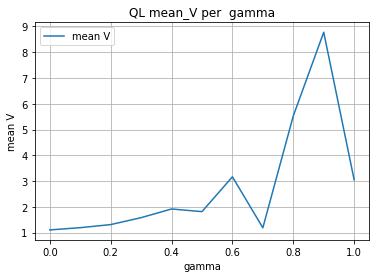

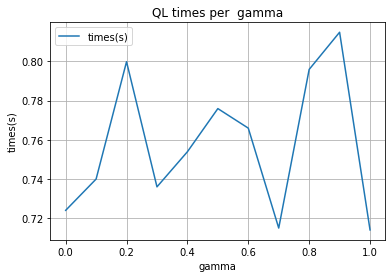

<Figure size 432x288 with 0 Axes>

In [80]:
tune_ql("gamma", np.arange(0, 1.1, 0.1))

policy for  epsilon_decay  =  0.0 : (0, 0, 1, 0, 0)
policy for  epsilon_decay  =  0.1 : (0, 0, 0, 0, 0)
policy for  epsilon_decay  =  0.2 : (0, 1, 1, 0, 0)
policy for  epsilon_decay  =  0.30000000000000004 : (0, 1, 0, 0, 1)
policy for  epsilon_decay  =  0.4 : (0, 1, 1, 1, 0)
policy for  epsilon_decay  =  0.5 : (0, 0, 0, 0, 0)
policy for  epsilon_decay  =  0.6000000000000001 : (0, 1, 0, 1, 0)
policy for  epsilon_decay  =  0.7000000000000001 : (0, 0, 1, 0, 0)
policy for  epsilon_decay  =  0.8 : (0, 1, 1, 0, 0)
policy for  epsilon_decay  =  0.9 : (0, 1, 0, 1, 0)
policy for  epsilon_decay  =  1.0 : (0, 0, 0, 0, 0)


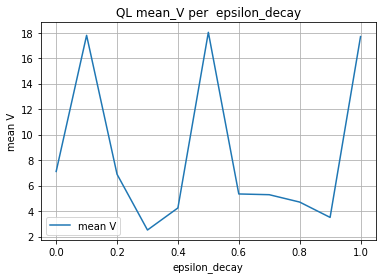

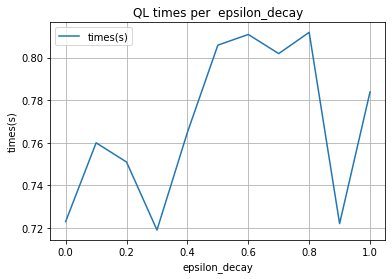

<Figure size 432x288 with 0 Axes>

In [81]:
tune_ql("epsilon_decay", np.arange(0, 1.1, 0.1))

policy for  alpha_decay  =  0.0 : (0, 1, 1, 1, 0)
policy for  alpha_decay  =  0.1 : (0, 1, 0, 0, 0)
policy for  alpha_decay  =  0.2 : (0, 1, 1, 1, 0)
policy for  alpha_decay  =  0.30000000000000004 : (0, 1, 1, 0, 0)
policy for  alpha_decay  =  0.4 : (0, 1, 1, 0, 0)
policy for  alpha_decay  =  0.5 : (0, 1, 0, 0, 0)
policy for  alpha_decay  =  0.6000000000000001 : (0, 1, 1, 1, 1)
policy for  alpha_decay  =  0.7000000000000001 : (0, 1, 1, 1, 1)
policy for  alpha_decay  =  0.8 : (0, 1, 1, 1, 0)
policy for  alpha_decay  =  0.9 : (0, 1, 1, 0, 0)
policy for  alpha_decay  =  1.0 : (0, 0, 0, 0, 0)


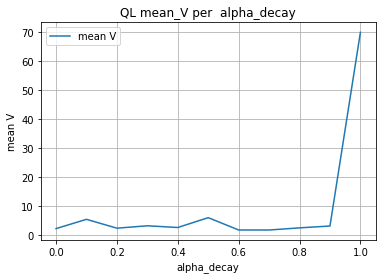

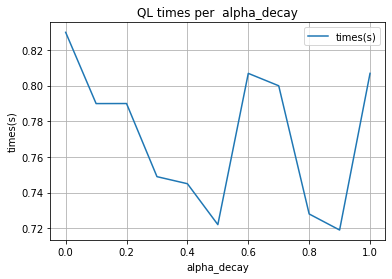

<Figure size 432x288 with 0 Axes>

In [82]:
tune_ql("alpha_decay", np.arange(0, 1.1, 0.1))

policy for  gamma  =  0.1 : (0, 1, 1, 1, 0)
policy for  gamma  =  0.2 : (0, 1, 1, 1, 0)
policy for  gamma  =  0.30000000000000004 : (0, 1, 1, 0, 0)
policy for  gamma  =  0.4 : (0, 1, 1, 0, 0)
policy for  gamma  =  0.5 : (0, 1, 0, 0, 0)
policy for  gamma  =  0.6 : (0, 1, 0, 0, 0)
policy for  gamma  =  0.7000000000000001 : (0, 0, 0, 0, 0)
policy for  gamma  =  0.8 : (0, 0, 0, 0, 0)
policy for  gamma  =  0.9 : (0, 0, 0, 0, 0)


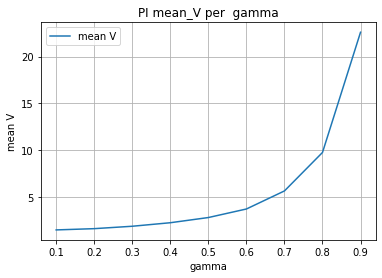

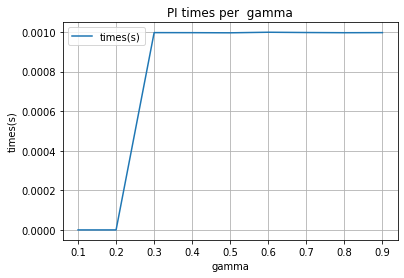

<Figure size 432x288 with 0 Axes>

In [83]:
tune_pi("gamma", np.arange(0.1, 1.0, 0.1))